In [1]:
# import python

import csv
import matplotlib.pylab as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import scipy.interpolate as spi

## Emille's code

later butchered by Alex

In [2]:
# import R
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro

In [3]:
# # only run this once ever
# utils = importr('utils')
# utils.install_packages('spatstat')
# utils.install_packages('sparr')
# utils.install_packages('dplyr')
# utils.install_packages('magrittr')
# utils.install_packages('reshape2')

In [4]:
# import R packages

ro.r('library(spatstat)')
ro.r('library(sparr)')
ro.r('library(dplyr)')
ro.r('library(magrittr)')
ro.r('library(reshape2)')

R[write to console]: Loading required package: spatstat.data

R[write to console]: Loading required package: nlme

R[write to console]: Loading required package: rpart

R[write to console]: 
spatstat 1.63-3       (nickname: ‘Wet paint’) 
For an introduction to spatstat, type ‘beginner’ 


R[write to console]: 
Note: R version 3.6.0 beta (2019-04-11 r76379) is more than a year old; we strongly recommend upgrading to the latest version

R[write to console]: 

Welcome to
   _____ ___  ____  ____  ____         
  / ___// _ \/ _  \/ __ \/ __ \        
  \__ \/ ___/ __  /  ___/  ___/        
 ___/ / /  / / / / /\ \/ /\ \          
/____/_/  /_/ /_/_/  \__/  \_\   v2.2-13

- type news(package="sparr") for an overview
- type help("sparr") for documentation
- type citation("sparr") for how to cite


R[write to console]: Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following obj

'reshape2','magrittr','dplyr',...,'datasets','methods','base'


In [5]:
ro.r('options(digits=20)')

digits,[RTYPES.INTSXP]


In [6]:
chosenz = 2
chosenbox = 21
chosenbubble = 0

infn = "../Data/bubbles/z"+str(chosenz)+"box"+str(chosenbox)+"bubble"+str(chosenbubble)+".csv"

outfn = "../Data/bubbles/z"+str(chosenz)+"box"+str(chosenbox)+"bubble"+str(chosenbubble)+"kde.csv"

## Alex's code

Get particle density per degree overall to normalize density in each cell.

In [7]:
# all_particle_files = sorted([f for f in listdir('../Data/bubbles') if isfile(join('../Data/bubbles', f))])
# N_SLICS, A_SLICS, lims_SLICS = [], [], []
# for i in all_particle_files:
#     particles = pd.read_csv(os.path.join('../Data/bubbles', i))
#     N_SLICS.append(len(particles))
#     extrema = particles.agg([min, max])
#     lims_SLICS.append(extrema)
#     cut_area = (extrema['RA']['max'] - extrema['RA']['min']) * (extrema['DEC']['max'] - extrema['DEC']['min'])
#     A_SLICS.append(cut_area)
# #     print((i, cut_area))

In [7]:
# N_SLICS = np.array(N_SLICS)
# A_SLICS = np.array(A_SLICS)

In [8]:
# dens_cell = (N_SLICS / A_SLICS)
# # print(dens_cell)

In [9]:
# dens_SLICS = sum(N_SLICS) / sum(A_SLICS)
# # print(dens_SLICS)

In [10]:
# plt.hist(dens_cell, density=False)
# plt.vlines(dens_SLICS, 0., 1.)

In [11]:
# dens_rel = (dens_cell - dens_SLICS) / dens_SLICS#(dens_cell / dens_SLICS)
# # print(dens_rel)

In [12]:
# plt.hist(dens_rel, density=False)
# plt.vlines(0., 0., 1.)

In [13]:
# # constant linear bias factor
# b_g = 1.1

In [14]:
# bias_thresh_rel = b_g * (dens_rel * (A_SLICS / 256**2))
# print(bias_thresh_rel)

## more of Emille's code

later butchered by Alex

In [8]:
# here I am reading one bubble of data
ro.r('dataRAW <- read.csv("'+infn+'")')
# try data.table's fread

# get single columns from data frame
ro.r('x <- dataRAW$RA')
ro.r('y <- dataRAW$DEC')

# put in the correct format
ro.r('myPointData <- ppp(x, y, xrange=range(x), yrange=range(y))')

window,[RTYPES.VECSXP]
n,[RTYPES.INTSXP]
x,[RTYPES.REALSXP]
y,[RTYPES.REALSXP]
markformat,[RTYPES.STRSXP]


In [9]:
# read variables into R section
ro.r('h0 = 0.01')
ro.r('resolution = 256')

256.000000


In [10]:
# do KDE, this is the (very) slow step
ro.r('ddest <- bivariate.density(myPointData, h0=h0, adapt=TRUE, resolution=resolution)')

R object with classes: ('bivden',) mapped to:
[ListSexpV..., FloatSexp..., FloatSexp..., FloatSexp..., ..., ListSexpV..., FloatSexp..., FloatSexp..., ListSexpV...]
  z: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x7f341fefdc88> [RTYPES.VECSXP]
  h0: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f341fefda48> [RTYPES.REALSXP]
  hp: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f341fefdc88> [RTYPES.REALSXP]
  h: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f341fefda48> [RTYPES.REALSXP]
  him: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x7f341fefdc88> [RTYPES.VECSXP]
  q: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x7f341fe8c608> [RTYPES.VECSXP]
  gamma: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f341fefdc88> [RTYPES.REALSXP]
  geometric: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f341fe8c6c8> [RTYPES.REALSXP]
  pp: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x7f341fe8c808> [RTYPES.VECSXP]

In [11]:
# # output from KDE
# ro.r('myDensEst <- ddest$z')

# # define boundaries
# ro.r('mins <- c(min(x), min(y))')
# ro.r('maxs <- c(max(x), max(y))')

193.086440,163.033130


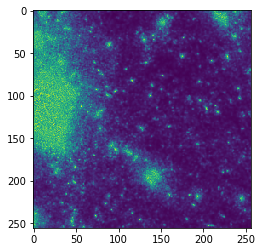

In [23]:
plt.imshow(ro.r('ddest$z$v'))

In [34]:
# write output to file
ro.r('write.csv(ddest$z$v, "'+outfn+'")')

<rpy2.rinterface.NULLType object at 0x7f3424de4bc8> [RTYPES.NILSXP]

In [32]:
plt.hist(ro.r('ddest$z$v').flatten())

AttributeError: 'FloatMatrix' object has no attribute 'flatten'

In [29]:
type(ro.r('ddest$kde2d'))

rpy2.rinterface.NULLType

In [24]:
# number of points to sample
ro.r('nPoints = 1000')#520000')

# normalize
ro.r('densEst <- ddest$kde2d)')#'/max(ddest$kde2d, na.rm=TRUE)')
     
# get dimension
ro.r('xdim <- dim(densEst)[1]')
ro.r('ydim <- dim(densEst)[2]')

ro.r('myNewXX <- vector(mode="numeric", length=nPoints)')
ro.r('myNewYY <- vector(mode="numeric", length=nPoints)')


0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000


In [26]:
ro.r('nPoints')

100.000000


In [28]:
# data_raw = pd.read_csv('data/64split/rawdata_00_00_00.csv')

ro.r('selPoints <- 1')

# Sample from density
for i in range(int(ro.r('nPoints')[0])):
    ro.r('xx <- (runif(1) * xdim)')
    ro.r('yy <- (runif(1) * ydim)')
    ro.r('zz <- runif(1)')
    ro.r('myNewXX[selPoints] <- xx')
    ro.r('myNewYY[selPoints] <- yy')
    ro.r('selPoints <- selPoints + 1')

R[write to console]: Error in myNewXX[selPoints] <- xx : replacement has length zero
Calls: <Anonymous> -> <Anonymous>

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In max(ddest$kde2d, na.rm = TRUE) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf

R[write to console]: 2: 
R[write to console]: In max(ddest$kde2d, na.rm = TRUE) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf



RRuntimeError: Error in myNewXX[selPoints] <- xx : replacement has length zero
Calls: <Anonymous> -> <Anonymous>


In [ ]:
# get new points into dataframe
ro.r('dataOUT = data.frame(x=myNewXX, y=myNewYY)')

In [ ]:
# write output to file
ro.r('write.csv(dataOUT, '+outfn+')')

In [ ]:
# read output in python
particles = pd.read_csv(infn)

In [ ]:
# read output in python
galaxies = pd.read_csv(outfn)

## more of Alex's code

Now compare to KDE in cell

In [ ]:
all_kde_files = sorted([f for f in listdir('../Data/from_KDE') if isfile(join('../Data/from_KDE', f))])
kde_dens, kde_ras, kde_decs, kde_interps, kde_means = [], [], [], [], []
for j in range(N_cells):
    i = all_kde_files[j]
    kdes = pd.read_csv(os.path.join('../Data/from_KDE', i))
    ra_grid = kdes['RA'].unique()
    kde_ras.append(ra_grid)
    dec_grid = kdes['DEC'].unique()
    kde_decs.append(dec_grid)
    dens_grid = np.reshape(kdes['Dens'].values, (len(ra_grid), len(dec_grid)))
    kde_dens.append(dens_grid)
    dens_mean = dens_grid * (A_SLICS[j] / 256**2)
    assert(np.isclose(1., np.sum(dens_mean)))
    kde_means.append(dens_mean)
    kde_model_dens = spi.RectBivariateSpline(ra_grid, dec_grid, dens_grid)
    kde_interps.append(kde_model_dens)

In [ ]:
N_cells = len(all_kde_files)

In [ ]:
for j in range(N_cells):
    plt.hist(kde_dens[j].flatten(), alpha=0.5)
plt.semilogy()
plt.vlines(avg_prob_dens, 0., 1.e5)
plt.xlabel()

In [ ]:
avg_prob_dens = N_cells / sum(A_SLICS)

In [ ]:
# for j in range(N_cells):
#     to_plot = np.log(kde_dens[j].flatten())# * (A_SLICS[j] / (len(kde_ras) * len(kde_decs))))
#     if len(to_plot[np.log(to_plot) > np.log(bias_thresh_rel[j])] > 0):
#         plt.hist(to_plot[to_plot > np.log(bias_thresh_rel[j])], alpha=0.1, density=False)
#     plt.vlines(np.log(bias_thresh_rel[j]), 0., 1., alpha=0.1)
# # plt.semilogx()

In [ ]:
# dens_mean

In [ ]:
# plt.figure(figsize=(20,10))

# plt.subplot(1,2,1)
# plt.title('original')
# plt.scatter(particles['RA'], particles['DEC'], s=.01)

# plt.subplot(1,2,2)
# plt.title('interpolated KDE')
# plt.contourf(ra_grid, dec_grid, dens_grid.T)
# plt.show()

In [ ]:
# min_cell = np.argmin(dens_rel)
# plt.hist(np.log(kde_dens[min_cell].flatten()), alpha=0.5, color='r')
# plt.vlines(np.log(np.mean(kde_dens[min_cell])), 0., 25000, color='r', linestyle=':')
# plt.vlines(np.log(bias_thresh_rel[min_cell]), 0, 25000, color='r', linestyle='--')
# max_cell = np.argmax(dens_rel)
# plt.hist(np.log(kde_dens[max_cell].flatten()), alpha=0.5, color='b')
# plt.vlines(np.log(np.mean(kde_dens[max_cell])), 0., 25000, color='b', linestyle=':')
# plt.vlines(np.log(bias_thresh_rel[max_cell]), 0, 25000, color='b', linestyle='--')

In [ ]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# # plt.subplot(1,2,1)
# # plt.title('min mean density')
# cf = axes[0].contourf(kde_ras[min_cell], kde_decs[min_cell], np.log(kde_dens[min_cell].T), vmin=0., vmax=1.)

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# cbar = fig.colorbar(cf, cax=cbar_ax)

# # plt.subplot(1,2,2)
# # plt.title('max mean density')
# cf = axes[1].contourf(kde_ras[max_cell], kde_decs[max_cell], np.log(kde_dens[max_cell].T), vmin=0., vmax=1.)

# # fig.subplots_adjust(right=0.8)
# # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# # cbar = fig.colorbar(cf, cax=cbar_ax)

# plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
for j in range(N_cells):
    plt.contourf(kde_ras[j], kde_decs[j], kde_dens[j].T, vmin=0., vmax=2.4)
plt.colorbar()
plt.title('raw KDEs (linear)')
plt.savefig('raw_kde_linear.png')

In [ ]:
fig = plt.figure(figsize=(10,10))
for j in range(N_cells):
    plt.contourf(kde_ras[j], kde_decs[j], np.log(kde_dens[j].T), vmin=-4.2, vmax=1.2)
plt.colorbar()
plt.title('raw KDEs (log)')
plt.savefig('raw_kde_log.png')

In [ ]:
fig = plt.figure(figsize=(10,10))
for j in range(len(all_kde_files)):
    plt.contourf(kde_ras[j], kde_decs[j], (kde_dens[j].T - dens_SLICS)/dens_SLICS)#, vmin=-7, vmax=-1.5)
plt.colorbar()
plt.title('KDEs as density contrast')
plt.savefig('kde_density_contrast.png')

In [ ]:
kde_model_dens = spi.RectBivariateSpline(ra_grid, dec_grid, dens_grid)
kde_interps.append(kde_model_dens)

sample mock galaxy positions from KDEs

_(in progress)_

In [ ]:
def samp_gal_pos(N, thresholds):
    acc_pos = np.empty((N, 3))
    i = 0
    while i < N:
        which_cell = np.random.randint(0, N_cells)
        which_ra = np.random.uniform(min(kde_ras[which_cell]), max(kde_ras[which_cell]))
        which_dec = np.random.uniform(min(kde_decs[which_cell]), max(kde_decs[which_cell]))
        kde_val = kde_interps[which_cell](which_ra, which_dec)
        if kde_val > thresholds[which_cell]:
            acc_pos[i] = np.array([which_ra, which_dec, kde_val[0][0]])
            i += 1
    return(acc_pos)

So this gives the KDE value at a random point in space, knowing that there's equal probability in each cell.
However, a galaxy will only form at that location if the KDE's value is higher than the average probability density overall times the bias factor.
The overall density is calculated per unit area, but the KDE at a point is based on one (256\*256)th of the specific area of its cell, so that threshold needs to be adjusted for the granularity of the area to which the KDE was normalized. . .

In [ ]:
plt.scatter()

In [ ]:
# still working on this

    
def rej_samp(dens, threshold):
    if dens > threshold:
        

In [ ]:
extrema = lims_SLICS[0]
mock_samps = pd.DataFrame.from_dict({'RA': [], 'DEC': []})
mock_samps['RA'] = np.random.uniform(extrema['RA']['min'], extrema['RA']['max'], 1000)
mock_samps['DEC'] = np.random.uniform(extrema['DEC']['min'], extrema['DEC']['max'], 1000)

In [ ]:
# print(kde_dens[0].mean())
cut_area = (extrema['RA']['max'] - extrema['RA']['min']) * (extrema['DEC']['max'] - extrema['DEC']['min'])
assert(np.isclose(1., np.sum(kde_dens[0]) * (A_SLICS[0] / 256**2)))

In [ ]:
# dens_cell[0] / dens_SLICS

placeholder for global mean necessary for bias, actually depends on total angular area at that redshift

In [ ]:
# data_path = '/media/CRP6/Cosmology/recidivator/SLICS/particle_data/0.042cut.csv'
# data_raw = pd.read_csv(data_path)
# glob_extrema = data_raw.agg([min, max])
# full_area = (glob_extrema['RA']['max'] - glob_extrema['RA']['min']) * (glob_extrema['DEC']['max'] - glob_extrema['DEC']['min'])

In [ ]:
# plt.hist(data_raw['RA'], alpha=0.5)
# plt.hist(data_raw['DEC'], alpha=0.5)

In [ ]:
# print(full_area / cut_area)
# n_SLICS = N_SLICS / full_area * (cut_area / 256**2)
# print(n_SLICS)

In [ ]:
# bias_placeholder = 0.1 * n_SLICS